<a href="https://colab.research.google.com/github/CleverGnd/Projeto_Tecnicas_de_Programacao_I/blob/main/Projeto_Final_4Mod_ADA_DADOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas necessaria para a analise.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import io
from io import StringIO

In [67]:
# Caminho para o arquivo ZIP
caminho_arquivo_zip = 'archive.zip'

# Lista para armazenar os dados de cada arquivo
dados = []

# Abre o arquivo ZIP em modo leitura
with zipfile.ZipFile(caminho_arquivo_zip, 'r') as arquivo_zip:
    # Itera sobre os arquivos dentro do ZIP
    for nome_arquivo in arquivo_zip.namelist():
        # Lê o conteúdo do arquivo
        with arquivo_zip.open(nome_arquivo) as arquivo_dentro_zip:
            # Decodifica o conteúdo para uma string
            conteudo_str = arquivo_dentro_zip.read().decode("utf-8")

            # Cria um DataFrame com os dados do arquivo
            df = pd.read_csv(StringIO(conteudo_str))  # Usa StringIO diretamente

            # Adiciona o DataFrame à lista
            dados.append(df)

# Concatena todos os DataFrames da lista em um único DataFrame
df_completo = pd.concat(dados, ignore_index=True)

# Imprime o DataFrame resultante
print(df_completo)

                Country Region  Ladder  Social Support  Freedom  Corruption  \
0           Afghanistan      4   4.040           0.525    0.540       0.755   
1               Albania      1   5.550           0.759    0.553       0.827   
2               Algeria      8   5.422           0.831    0.551       0.681   
3                Angola      9   5.589           0.723    0.584       0.912   
4             Argentina      6   6.562           0.906    0.764       0.810   
...                 ...    ...     ...             ...      ...         ...   
3188  Congo Brazzaville    NaN     NaN             NaN      NaN         NaN   
3189             Rwanda    NaN     NaN             NaN      NaN         NaN   
3190     Congo Kinshasa    NaN     NaN             NaN      NaN         NaN   
3191            Comoros    NaN     NaN             NaN      NaN         NaN   
3192           Zimbabwe    NaN     NaN             NaN      NaN         NaN   

      Donation  Generosity  Positive Affect  Negati

#Como podemos ver temos muitas informações ausentes, com isso optamos em focar somente com 9 colunas e 897 linhas desses dados. Em alguns anos os dados nao foram corretamente coletados com isso danificando as Analises

#Dados tratados;
[Cliquea aqui abrir os dados ⏩ Dados Tratados](https://onedrive.live.com/edit?id=4F8D62D2A67D69A0!419&resid=4F8D62D2A67D69A0!419&ithint=file%2cxlsx&wdo=2&cid=4f8d62d2a67d69a0);



In [73]:

# Caminho para o arquivo XLSX
caminho_arquivo_xlsx = 'report_felicidade.xlsx'

# Lê o arquivo XLSX
df = pd.read_excel(caminho_arquivo_xlsx)

df_final = pd.DataFrame(df)

# Imprime o DataFrame
print(df_final.describe())


            Score  GDP per capita  Social support  Healthy life expectancy  \
count  897.000000      897.000000      897.000000               896.000000   
mean     5.477952        1.067414        1.074146                 0.586181   
std      1.106629        0.465526        0.334083                 0.247784   
min      1.859000        0.000000        0.000000                 0.000000   
25%      4.640000        0.758000        0.865000                 0.403500   
50%      5.510400        1.070000        1.114000                 0.599500   
75%      6.257600        1.379000        1.347520                 0.779000   
max      7.842000        2.209000        1.644000                 1.141000   

       Freedom to make life choices  Generosity  Perceptions of corruption  \
count                    897.000000  897.000000                 896.000000   
mean                       0.475892    0.172168                   0.130955   
std                        0.154208    0.093933                

In [68]:
df_final.shape


(897, 9)

In [63]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       897 non-null    object 
 1   Score                         897 non-null    float64
 2   GDP per capita                897 non-null    float64
 3   Social support                897 non-null    float64
 4   Healthy life expectancy       896 non-null    float64
 5   Freedom to make life choices  897 non-null    float64
 6   Generosity                    897 non-null    float64
 7   Perceptions of corruption     896 non-null    float64
 8   Year                          897 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 63.2+ KB




> Podemos preencher o dado que estiver faltando com o ffill, como sugerido no codigo abaixo ⏬
```
df_copy = df_final.copy()
df_copy['Perceptions of corruption'].ffill(inplace=True)
df_copy['Healthy life expectancy'].ffill(inplace=True)


```



## Ordenando os dados através dos Anos





In [61]:
df_final.head(7)
df_ordenado = df_final.sort_values(by='Year')

In [77]:
df_ordenado.head()

,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
100,Nepal,4.880,0.425,1.228,0.539,0.526,0.302,0.078,2018
101,Venezuela,4.806,0.996,1.469,0.657,0.133,0.056,0.052,2018
102,Gabon,4.758,1.036,1.164,0.404,0.356,0.032,0.052,2018
103,Palestinian Territories,4.743,0.642,1.217,0.602,0.266,0.086,0.076,2018


In [83]:
df_final['Year'].describe()

count     897.000000
mean     2020.428094
std         1.697428
min      2018.000000
25%      2019.000000
50%      2020.000000
75%      2022.000000
max      2023.000000
Name: Year, dtype: float64

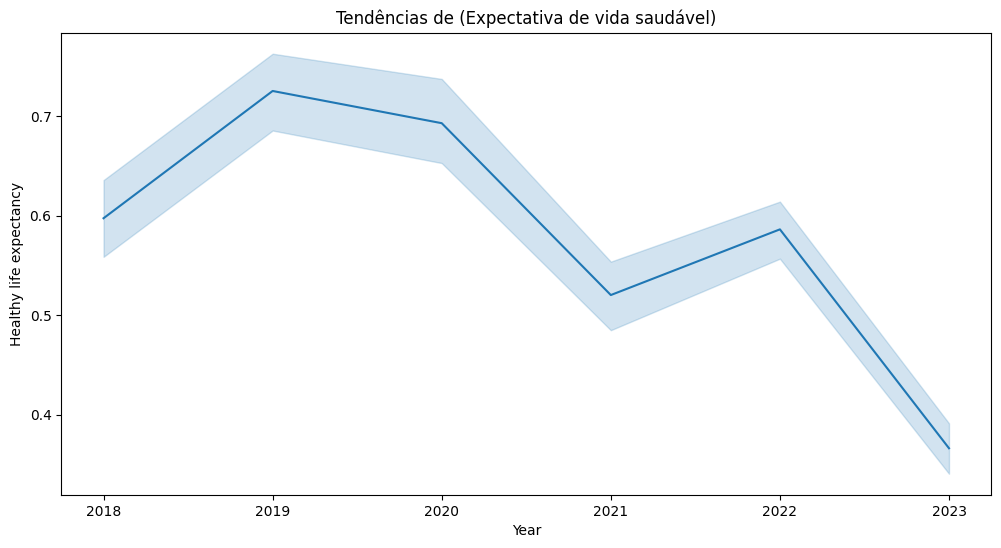

In [108]:
# 1- Gráfico de Linhas para Tendências da Expectativa de vida saudável.
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Healthy life expectancy', data=df_final)
plt.title('Tendências de (Expectativa de vida saudável)')
plt.show()


In [109]:
df_final.columns

Index(['Country', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year'],
      dtype='object')

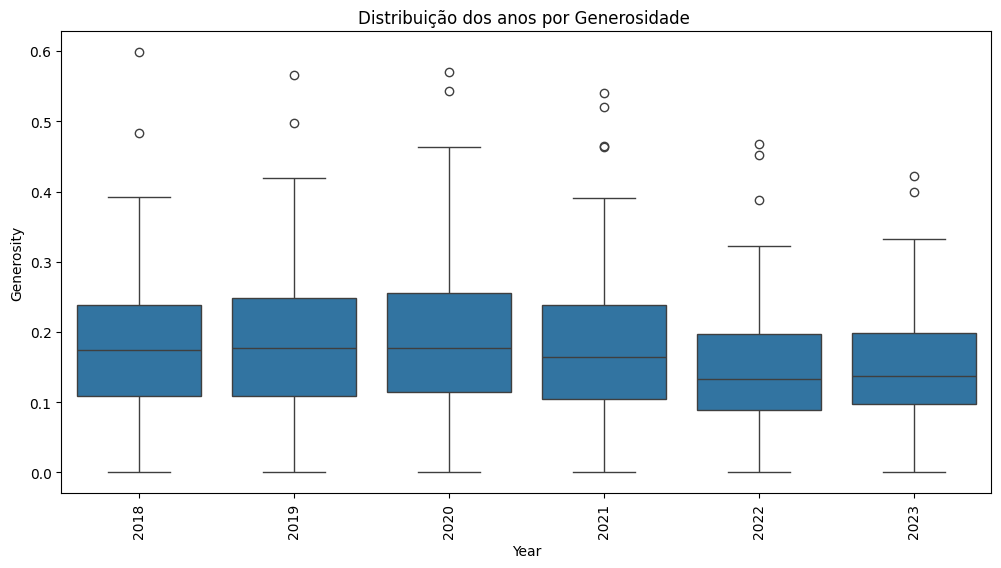

In [127]:
# 2- Gráfico de(Boxplot)(outlier)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Generosity', data=df_final)
plt.title('Distribuição dos anos por Generosidade ')
plt.xticks(rotation=90)
plt.show()

<ipython-input-120-d757f0d75d7a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacoes = df_final.corr()


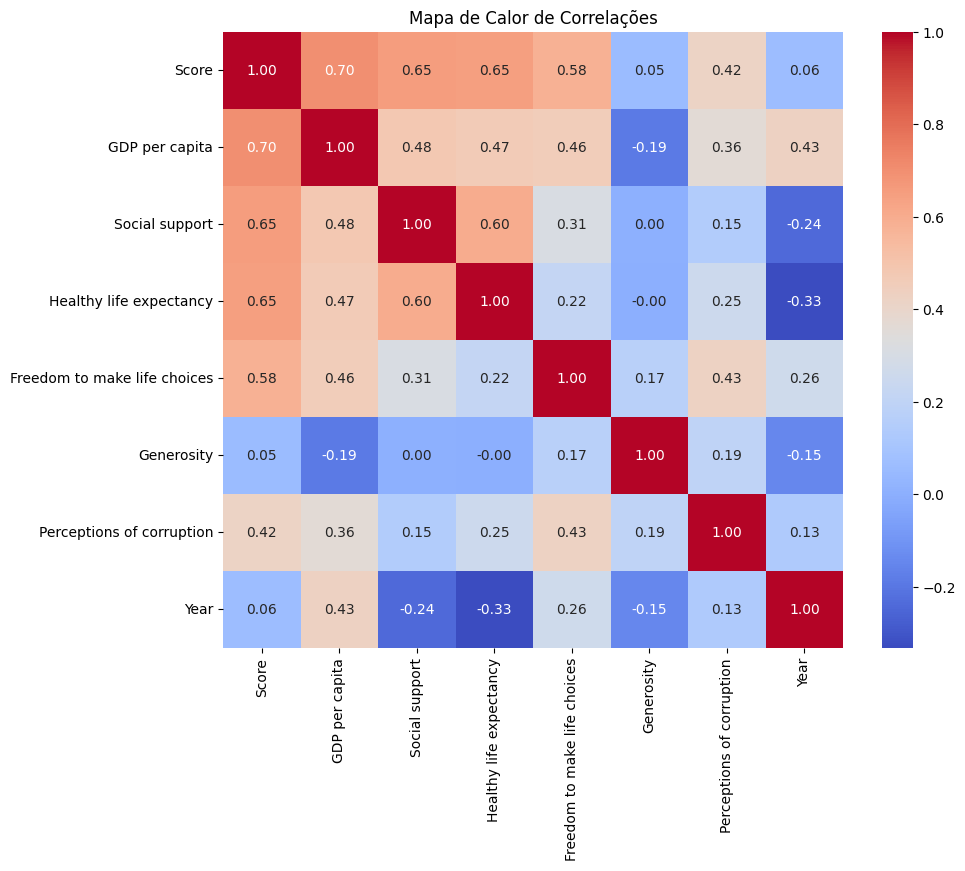

In [120]:
# 3-  Mapa de Calor para Correlações;
correlacoes = df_final.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt=".2f");
plt.title('Mapa de Calor de Correlações')
plt.show()

In [130]:
# Salva o DataFrame como um arquivo CSV
df_final.to_csv('df_final', index=False)

# Index=False é usado para evitar a inclusão do índice do DataFrame no arquivo CSV
